## Rozwiązanie lab 3

In [1]:
from PIL import Image, ImageDraw, ImageFont

#### Wizualizacja algorytmu obliczania odległości edycyjnej

In [2]:
def draw_word(text, change=None):
    m = len(text)
    d = 40
    img = Image.new(mode="RGB", size=(d*m, d), color=(176, 165, 155))

    draw = ImageDraw.Draw(img)
    for i in range(1, m + 1):
        draw.line([(i*d, 0), (i*d, d)], width=1, fill=(0, 0, 0))

    if change is not None:
        index, color = change
        draw.rectangle([(index*d, 0), ((index + 1)*d, d)], fill=color)

    font = ImageFont.truetype("arial.ttf", 20)
    for i in range(m):
        draw.text((i*d + d/2.5, d / 4), text=text[i], font=font, fill=(0, 0, 0))
    display(img)

In [3]:
def visualise_edits(text1, text2, dp, parent):
    t1 = list(text1)
    i = len(text1)
    j = len(text2)
    draw_word(t1)
    print()
    while dp[i][j]:
        if parent[i][j] == 0:
            i -= 1
            j -= 1
            continue
        elif parent[i][j] == 1:
            i -= 1
            j -= 1
            old, t1[i] = t1[i], text2[j]
            draw_word(t1, (i, 'green'))
            print(f"Zamiana {old} na {text2[j]}")
        elif parent[i][j] == 2:
            i -= 1
            draw_word(t1, (i, 'red'))
            print(f"Usunięcie {t1[i]}")
            t1.pop(i)
            draw_word(t1)
        else:
            j -= 1
            t1.insert(i, text2[j])
            draw_word(t1, (i, 'green'))
            print(f"Dodanie {text2[j]}")
        print()
    draw_word(t1)


#### Algorytm obliczania odległości edycyjnej

In [4]:
from math import inf

def edit_distance(text1, text2, visualise=False):
    m = len(text1)
    n = len(text2)
    dp = [[inf for _ in range(n + 1)] for _ in range(m + 1)]
    parent = [[-1 for _ in range(n + 1)] for _ in range(m + 1)]

    for i in range(m + 1):
        dp[i][0] = i
    for i in range(n + 1):
        dp[0][i] = i

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if text1[i-1] == text2[j - 1]:
                dp[i][j] = dp[i-1][j-1]
                parent[i][j] = 0
            else:
                dp[i][j] = dp[i-1][j-1] + 1
                parent[i][j] = 1
                if dp[i][j] > dp[i-1][j] + 1:
                    dp[i][j] = dp[i-1][j] + 1
                    parent[i][j] = 2
                if dp[i][j] > dp[i][j - 1] + 1:
                    dp[i][j] = dp[i][j - 1] + 1
                    parent[i][j] = 3
    if visualise:
        visualise_edits(text1, text2, dp, parent)
    return dp[-1][-1], dp, parent

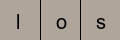

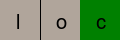

Zamiana s na c



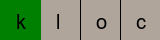

Dodanie k



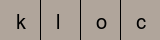

In [5]:
_ = edit_distance("los", "kloc", visualise=True)

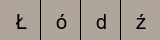

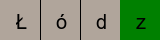

Zamiana ź na z



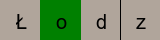

Zamiana ó na o



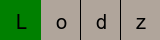

Zamiana Ł na L



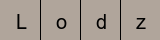

In [6]:
_ = edit_distance("Łódź", "Lodz", visualise=True)

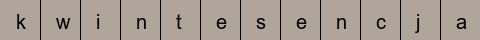

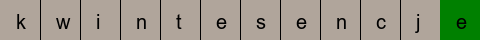

Zamiana a na e



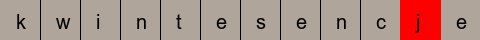

Usunięcie j


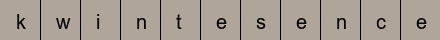

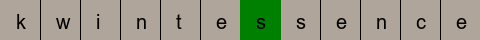

Dodanie s



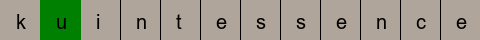

Zamiana w na u



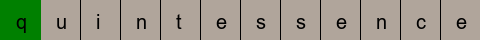

Zamiana k na q



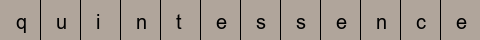

In [7]:
_ = edit_distance("kwintesencja", "quintessence", visualise=True)

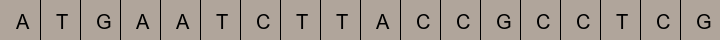

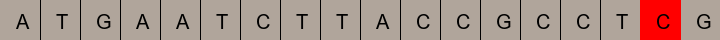

Usunięcie C


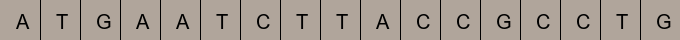

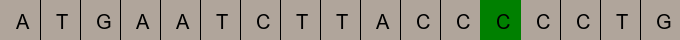

Zamiana G na C



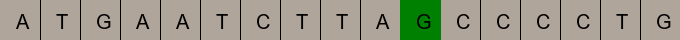

Zamiana C na G



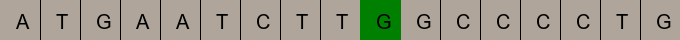

Zamiana A na G



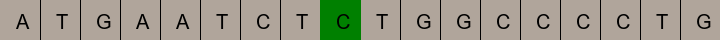

Dodanie C



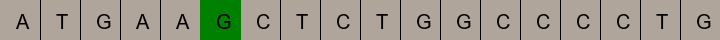

Zamiana T na G



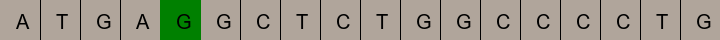

Zamiana A na G



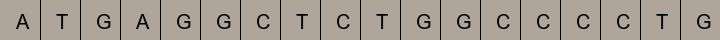

In [8]:
_ = edit_distance("ATGAATCTTACCGCCTCG", "ATGAGGCTCTGGCCCCTG", visualise=True)

### Najdłuższy wspólny podciąg

In [9]:
def lcs(text1, text2):
    m = len(text1)
    n = len(text2)
    dp = [[0 for _ in range(n + 1)] for _ in range(m + 1)]
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if text1[i-1] == text2[j-1]:
                dp[i][j] = dp[i-1][j-1] + 1
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])
    return dp[-1][-1], dp

In [10]:
with open("romeo-i-julia-700.txt", "r", encoding="UTF-8") as f:
    text = f.read()

In [11]:
from spacy.lang.pl import Polish
nlp = Polish()
doc = nlp(text)
token_list = list(doc)

In [12]:
from numpy.random import rand

truncated_text1 = []
for token in token_list:
    if token.text == '\n' or rand() > 0.03:
        truncated_text1.append(token.text)


truncated_text2 = []
for token in token_list:
    if token.text == '\n' or rand() > 0.03:
        truncated_text2.append(token.text)

In [14]:
print(f"Długość pierwszego tekstu: {len(truncated_text1)}")
print(f"Długość drugiego tekstu: {len(truncated_text2)}")
ans, _ = lcs(truncated_text2, truncated_text1)
print(f"Długość najdłuższego wspólnego podciągu: {ans}")

Długość pierwszego tekstu: 2627
Długość drugiego tekstu: 2623
Długość najdłuższego wspólnego podciągu: 2553


In [15]:
with open("truncated1.txt", "w", encoding="UTF-8") as f1, open("truncated2.txt", "w", encoding="UTF-8") as f2:
    f1.write("".join(truncated_text1))
    f2.write("".join(truncated_text2))

In [16]:
with open("truncated1.txt", "r", encoding="UTF-8") as f1, open("truncated2.txt", "r", encoding="UTF-8") as f2:
    lines1 = f1.readlines()
    lines2 = f2.readlines()

In [17]:
def diff_lines(file, ind):
    different = [True for _ in range(len(file))]
    for i in ind:
        different[i] = False
    for i, line in enumerate(file):
        if different[i]:
            print(f"numer linii: {i}, {line}")

In [18]:
def find_diff(text1, text2):
    _, dp = lcs(text1, text2)
    i = len(text1)
    j = len(text2)
    index1 = []
    index2 = []
    while i > 0 and j > 0:
        if text1[i - 1] == text2[j - 1]:
            index1.append(i - 1)
            index2.append(j - 1)
            i -= 1
            j -= 1
        else:
            if dp[i][j - 1] > dp[i - 1][j]:
                j -= 1
            else:
                i -= 1
    print("Niepasujące linie z pierwszego pliku")
    diff_lines(lines1, index1)
    print("Niepasujące linie z drugiego pliku")
    diff_lines(lines2, index2)

In [19]:
find_diff(lines1, lines2)

Niepasujące linie z pierwszego pliku
numer linii: 3, tłum.JózefPaszkowski

numer linii: 11,  *PARYS—młodyWeroneńczykrodu,krewnyksięcia

numer linii: 15,  *MERKUCJO—krewnyksięcia

numer linii: 18,  *LAURENTY—franciszkanin

numer linii: 20,  *BALTAZAR—służącyRomea

numer linii: 22,  *—służącyMontekiego*APTEKARZ

numer linii: 23,  *TRZECHMUZYKANTÓW

numer linii: 24,  *PAŹPARYSA

numer linii: 25,  *PIOTR

numer linii: 27,  *PANIMONTEKImałżonkaMontekiego

numer linii: 31,  *Obywateleweroneńscy,różneosobypłciobojej,liczącysiędoprzyjaciółobudomówmaski,strażwojskowaiinneosoby.RzeczodbywasięwiększączęśćsztukiwWeronie,przezczęśćpiątegoaktuwMantui.

numer linii: 39, Dwarodyzacnejednakoisławne—

numer linii: 41, Donowejpchajązłościdawne,

numer linii: 76, Marozumieć,bobyśmybylizdziercami.

numer linii: 79, SAMSON

numer linii: 80, 

numer linii: 81, Alebędziemydarlikoty,jakznamizadrą.

numer linii: 86, Ktozechcezadrzećznami,będziemusiałzadrżeć.

numer linii: 96, Takalezarazzwykłeśsiędaćrozruchać.
